## Object Tracking Algorithm
To track people between video frames, we use our `ObjectTracker` class. 
This algorithm is less expensive computationally. We use it most of the time to track the objects detected by the Object Detection Algorithm.  
After declaring an instance of our `ObjectTracker` class, we pass the result of object detection to its `start_tracking` method. Then on subsequent frames, we only pass the frame image to the `update` method and it will automatically update the bounding boxes of all tracked objects.  
All targets are available via `ObjectTracker.targets` property.

In [1]:
from packages.object_tracking import ObjectTracker
from packages.utils.visualization import display_image, add_detected_boxes_to_image_array
from packages.utils.images import read_image
from packages.object_detection import ObjectDetector
from packages.utils.videos import VideoSource
import time

In [2]:
object_tracker = ObjectTracker()

In [3]:
detector = ObjectDetector('ssd_inception_v2')

[INFO] loading model...
Done.


In [4]:
vs = VideoSource('./videos/example_01.mp4')

running display


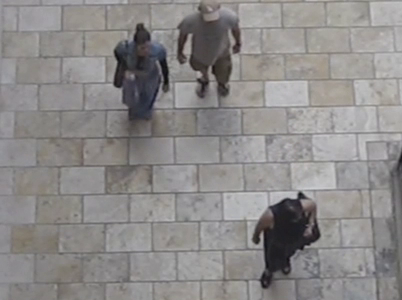

In [5]:
frame_1 = vs.get_frame(395)
display_image(frame_1)

running display


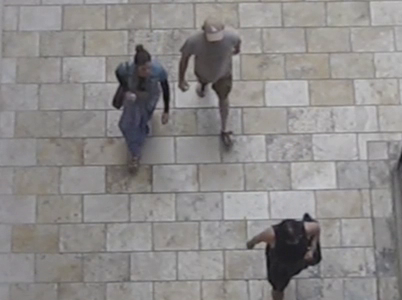

In [6]:
frame_2 = vs.get_frame(400)
display_image(frame_2)

In [7]:
output_dict = detector.detect_people(frame_1)

In [8]:
object_tracker.start_tracking(output_dict, frame_1)

running display


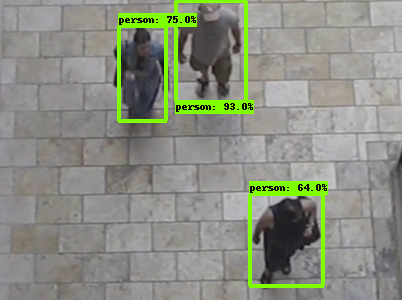

In [9]:
add_detected_boxes_to_image_array(frame_1, object_tracker.targets)
display_image(frame_1)

In [10]:
 object_tracker.targets["boxes"]

array([[175,   1, 246, 101],
       [118,  26, 166, 120],
       [249, 194, 323, 285]])

tracking took 0.038423776626586914 seconds.
running display


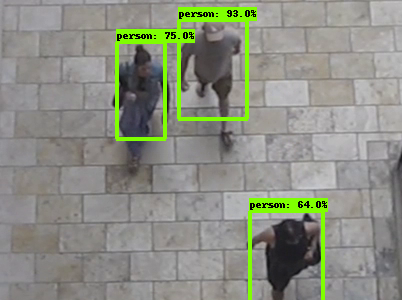

In [11]:
start_time = time.time()
object_tracker.update(frame_2)
end_time = time.time()
print("tracking took {} seconds.".format(end_time - start_time))
add_detected_boxes_to_image_array(frame_2, object_tracker.targets)
display_image(frame_2)

In [12]:
 object_tracker.targets["boxes"]

array([[178,  20, 247, 118],
       [116,  42, 165, 138],
       [249, 211, 323, 302]])